# Analysis of the Positive Dataset CD-HIT result

## Converting .fasta into pandas dataframe
Since the dataset is in .fasta format, we will first run a function that will convert it into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from Bio import SeqIO

In [2]:
## Reads the CD-HIT .fasta file output of the positive_dataset.fasta and converts into a pandas dataframe (clustered_positive_cdhit.fasta)
def fasta2df_positive_cdhit(fasta_file):
    """
    Reads the CD-HIT .fasta file output of the positive dataset and converts it into a pandas DataFrame.

    Parameters:
    fasta_file (str): Path to the CD-HIT clustered .fasta file of the positive dataset.

    Returns:
    pd.DataFrame: DataFrame with columns:
        - 'ID': Accession IDs of the sequences.
        - 'Sequence': Corresponding protein sequences.
        - 'Organism': Organism information extracted from the sequence description.
        - 'Family': Family information extracted from the sequence description.
        - 'Type': Type information extracted from the sequence description.
        - 'Size': Length of the protein sequences or value extracted from metadata.
        - 'Protein Acr': Protein acronym extracted from the sequence description.
    """
    # Read the FASTA file
    fasta_sequences = SeqIO.parse(open(fasta_file), 'fasta')

    # Create a list of dictionaries containing the sequences and their metadata
    data = []
    for fasta in fasta_sequences:
        # Extract metadata from the description line of the FASTA record
        description = fasta.description
        identifier = fasta.id                                               # 'ID' column (Accession ID)
        sequence = str(fasta.seq)                                           # 'Sequence' column

        # Use regular expressions to extract metadata
        matches = re.findall(r'(\w+)=([^=]+?)\s*(?=\w+=|$)', description)  # Updated regular expression
        metadata = dict(matches)

        # Append the data to the list as a dictionary
        data.append({'ID': identifier, 
                     'Sequence': sequence, 
                     'Organism': metadata.get('Organism'), 
                     'Family': metadata.get('Family'), 
                     'Type': metadata.get('Type'), 
                     'Size': int(metadata.get('Size', 0)), 
                     'Protein Acr': metadata.get('ProteinAcr')})

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    return df

In [3]:
# For CD-HIT result of positive_dataset.fasta:
df_cdhit = fasta2df_positive_cdhit("CDHIT_MMSeqs2_Files/clustered_positive_cdhit.fasta")
df_cdhit   # CD-HIT positive_dataset.fasta Output

,ID,Sequence,Organism,Family,Type,Size,Protein Acr
0,RGB60049.1,MSIYTDMIPAILLVNDPQDSLSGAPIENYVKVSNINVAIYKNDSFK...,Absiella sp.,AcrIIA8,II-A,105,Yes
1,WP_103240931.1,MSCPFQAMEGGNGMERKMALREFCGRYRKGDFKGTERAVQIEAGWY...,Acetatifactor muris,AcrIIA11,II-A,195,Yes
2,WP_086652143.1,MELIHTSDEVIKKIHKDGTFDTFLFFSASKYLAGSVASRKHYTYKI...,Acetobacter cibinongensis,AcrIF11,I-F,179,Yes
3,WP_012242545.1,MEKQQLLKDLIQAFNSGSFESSDVKVQIKAGWYDWFCKDSSLKNKT...,Acholeplasma laidlawii,AcrIIA11,II-A,144,Yes
4,WP_062681378.1,MQLFHTSPSEISTITSTGRFGSFLFFSARAYTMTAGEALVYSLEID...,Achromobacter denitrificans,AcrIF11,I-F,150,Yes
...,...,...,...,...,...,...,...
1117,CNL87740.1,MNFGQALQALKAGHKVARIGWNGKGMFPILISGTKDVEPCEGTPYA...,Yersinia pseudotuberculosis,AcrIIA7,II-A,146,Yes
1118,WP_050090803.1,MKLFHGSYSKTAPVIKVGAYALGSSDNIFDGLFASADIEIASSHGN...,Yersinia pseudotuberculosis,AcrIF11,I-F,162,Yes
1119,WP_071704514.1,MNFGEALEAVKSGKKIARSGWNGAAQFVIKAGGYTVSEARPGSDYA...,Yersinia ruckeri,AcrIIA7,II-A,88,Yes
1120,CFQ72446.1,MKLFHGSYSSTAPVMQIGQFTQVNGSENLYDGIFASDSMDSASSHG...,Yersinia similis,AcrIF11,I-F,141,Yes


# CD-HIT Analysis

In [4]:
# Metrics for Sequence Size
print("min size:", df_cdhit['Size'].min())          # Minimum of sequence size
print("max size:", df_cdhit['Size'].max())          # Maximum of sequence size
print("mean:", round(df_cdhit['Size'].mean()))      # Mean of sequence size
print("median:", int(df_cdhit['Size'].median()))    # Median of sequence size
print("sd:", round(df_cdhit['Size'].std(), 6))      # Standard Deviation of sequence size

min size: 47
max size: 528
mean: 122
median: 116
sd: 43.322783


In [5]:
# Defining an extra column "Genus"
df_cdhit['Genus'] = df_cdhit['Organism'].str.split().str[0]                         # Extracts the Genus of the Organism species name

# Creating a sub-dataframe with Genus names and Incidences of Genus names
genus_counts = df_cdhit['Genus'].value_counts().reset_index()                       # Counts Genus occurrences
genus_counts.columns = ['Genus', 'Incidences']                                      # Renames columns

df_genus_incidences = genus_counts.sort_values(by='Genus').reset_index(drop=True)   # Creates a new DataFrame with Genus and Incidences columns
df_genus_incidences

,Genus,Incidences
0,Absiella,1
1,Acetatifactor,1
2,Acetobacter,1
3,Acholeplasma,1
4,Achromobacter,2
...,...,...
255,Xanthomonas,5
256,Xenophilus,1
257,Xenorhabdus,8
258,Yersinia,11


In [6]:
df_cdhit.head()

,ID,Sequence,Organism,Family,Type,Size,Protein Acr,Genus
0,RGB60049.1,MSIYTDMIPAILLVNDPQDSLSGAPIENYVKVSNINVAIYKNDSFK...,Absiella sp.,AcrIIA8,II-A,105,Yes,Absiella
1,WP_103240931.1,MSCPFQAMEGGNGMERKMALREFCGRYRKGDFKGTERAVQIEAGWY...,Acetatifactor muris,AcrIIA11,II-A,195,Yes,Acetatifactor
2,WP_086652143.1,MELIHTSDEVIKKIHKDGTFDTFLFFSASKYLAGSVASRKHYTYKI...,Acetobacter cibinongensis,AcrIF11,I-F,179,Yes,Acetobacter
3,WP_012242545.1,MEKQQLLKDLIQAFNSGSFESSDVKVQIKAGWYDWFCKDSSLKNKT...,Acholeplasma laidlawii,AcrIIA11,II-A,144,Yes,Acholeplasma
4,WP_062681378.1,MQLFHTSPSEISTITSTGRFGSFLFFSARAYTMTAGEALVYSLEID...,Achromobacter denitrificans,AcrIF11,I-F,150,Yes,Achromobacter


In [7]:
print('Number of unique Organisms:', len(df_cdhit['Organism'].unique()))
print('Number of unique Acr Families:', len(df_cdhit['Family'].unique()))
print('Number of unique Acr Family Types:', len(df_cdhit['Type'].unique()))
print('Number of unique Genera:', len(df_cdhit['Genus'].unique()))

Number of unique Organisms: 639
Number of unique Acr Families: 124
Number of unique Acr Family Types: 18
Number of unique Genera: 260


# Protein Size by Genera (Top 50)

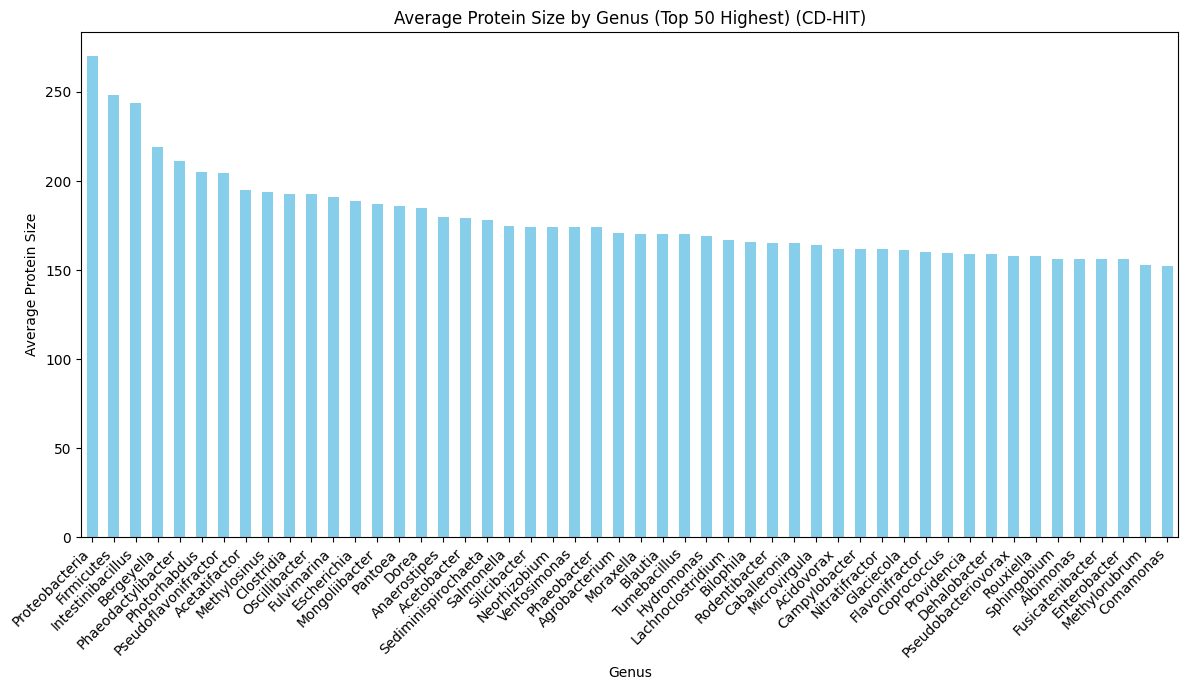

In [8]:
# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df_cdhit.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting the top 50 genera
top_genus_mean_size = genus_mean_size.head(50)

# Creating a bar plot
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Average Protein Size by Genus (Top 50 Highest) (CD-HIT)')
plt.xlabel('Genus')
plt.ylabel('Average Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Protein Size by Genera (Top 50) where Genera that occur less than 5 times are colored in orange

The bars in orange represent the Genera which have less than 5 occurrences:


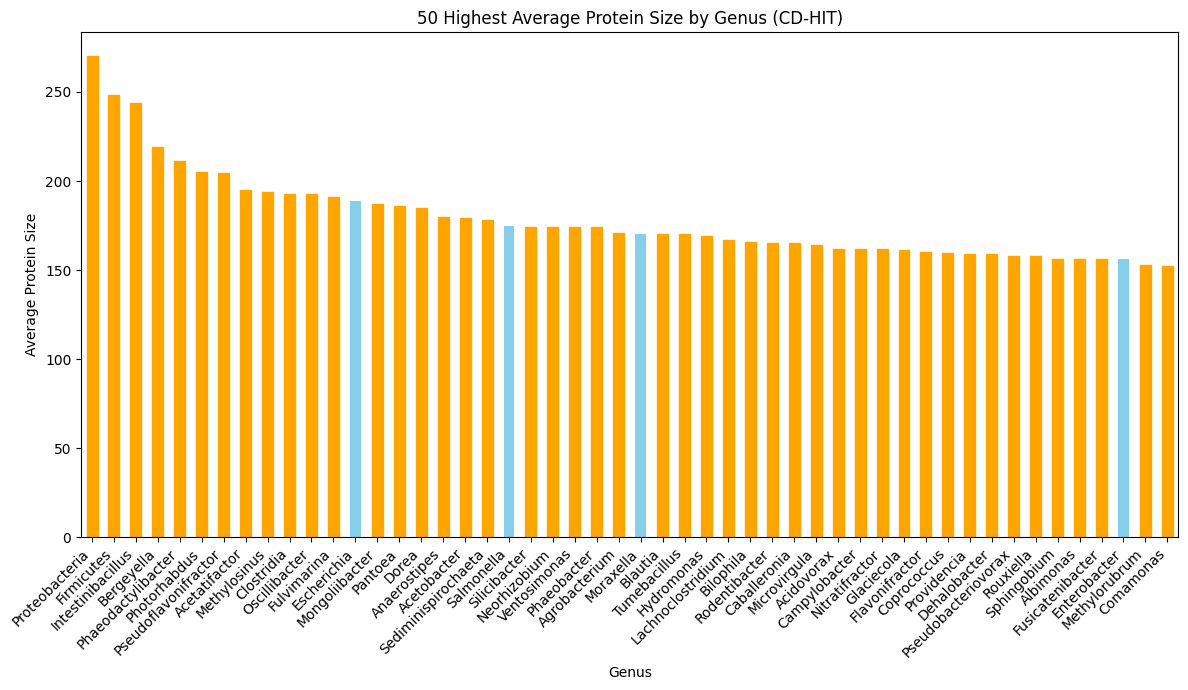

In [9]:
# Calculate mean size by genus
mean_size_by_genus = df_cdhit.groupby('Genus')['Size'].mean()

# Get the top 50 genera by mean size
top_genus_mean_size = mean_size_by_genus.sort_values(ascending=False).head(50)

# Get genus counts
genus_counts = df_cdhit['Genus'].value_counts()

# Creating a bar plot
plt.figure(figsize=(12, 7))
bars = top_genus_mean_size.plot(kind='bar', color='skyblue')

# Color genera occurring less than 5 times in orange
for bar in bars.patches:
    genus_name = top_genus_mean_size.index[bars.patches.index(bar)]
    if genus_counts[genus_name] < 5:
        bar.set_color('orange')

print('The bars in orange represent the Genera which have less than 5 occurrences:')
plt.title('50 Highest Average Protein Size by Genus (CD-HIT)')
plt.xlabel('Genus')
plt.ylabel('Average Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sequence Size by Genera that occur more than 5 times in the dataset (all cases)

The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:


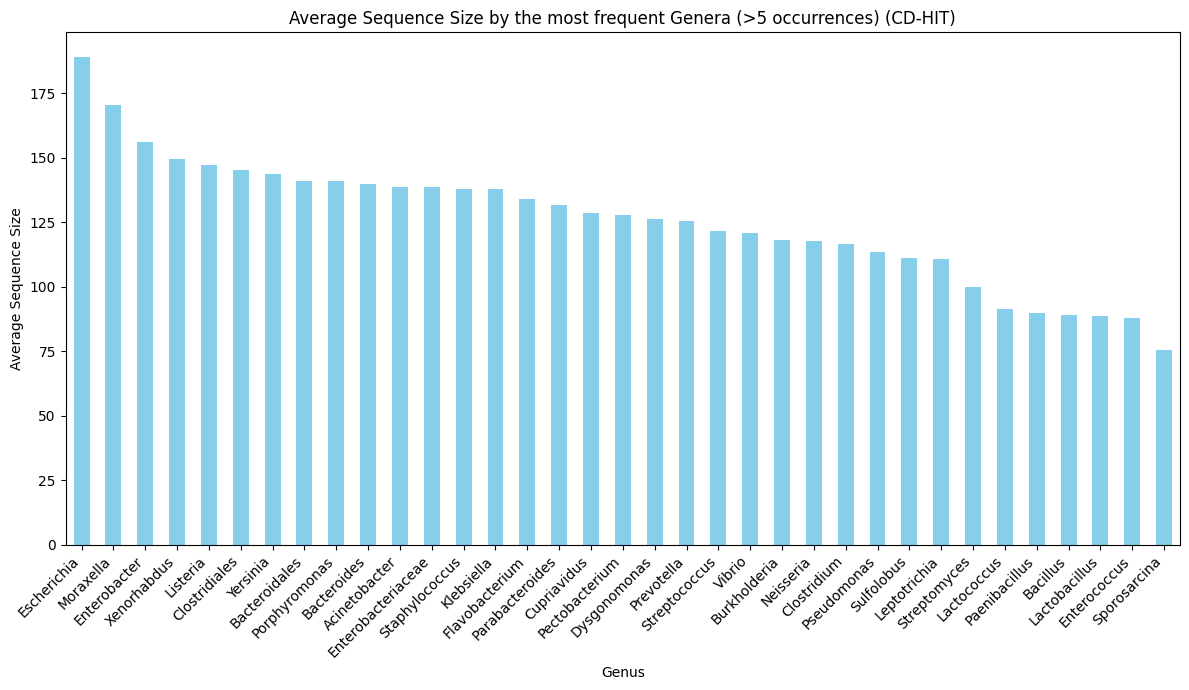

In [10]:
# Filter out genera with a frequency less than 5 counts
genus_counts = df_cdhit['Genus'].value_counts()
valid_genus = genus_counts[genus_counts > 5].index
df_filtered = df_cdhit[df_cdhit['Genus'].isin(valid_genus)]

# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df_filtered.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting all the genera
top_genus_mean_size = genus_mean_size.head(260)

# Creating a bar plot
print('The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:')
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Average Sequence Size by the most frequent Genera (>5 occurrences) (CD-HIT)')
plt.xlabel('Genus')
plt.ylabel('Average Sequence Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribution of Sequence Sizes
Plot Type: Histogram
This plot will help us understand the distribution of the lengths of the Acr protein sequences.

The Average Sequence Length in the CD-HIT positive dataset is 122 aminoacids


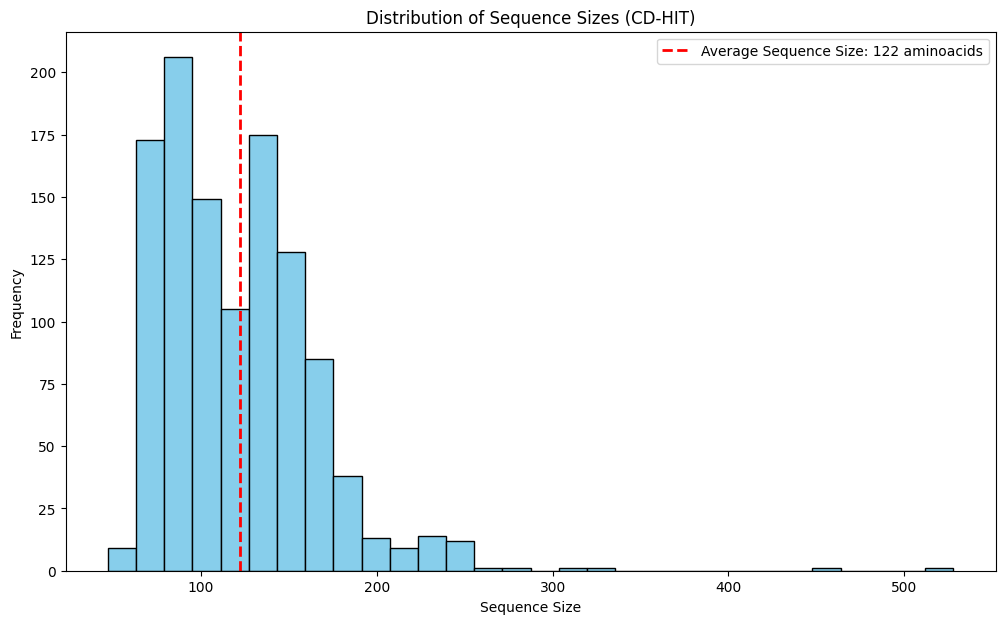

In [11]:
# Calculate the mean sequence size
mean_size = round(df_cdhit['Size'].mean())

# Print the average sequence length
print(f'The Average Sequence Length in the CD-HIT positive dataset is {mean_size} aminoacids')

# Plotting
plt.figure(figsize=(12, 7))
plt.hist(df_cdhit['Size'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_size, color='red', linestyle='--', linewidth=2, label=f'Average Sequence Size: {mean_size} aminoacids')
plt.title('Distribution of Sequence Sizes (CD-HIT)')
plt.xlabel('Sequence Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Frequency of Genera

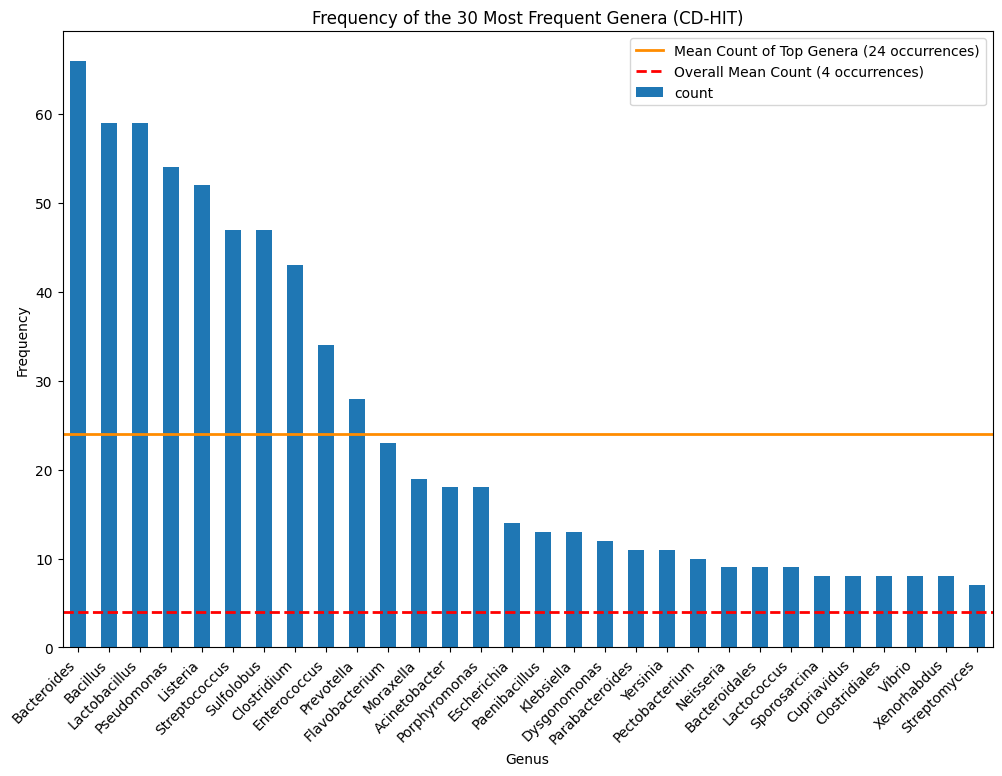

In [12]:
# Obtain genus counts
genus_counts = df_cdhit['Genus'].value_counts()

# Get the top 30 most frequent genera
top_genera = genus_counts.head(30)

# Calculate the mean count of occurrences of all genera
overall_mean_count = round(genus_counts.mean())

# Calculate the mean count of occurrences of top genera
mean_count = round(top_genera.mean())

# Plot the data
plt.figure(figsize=(12, 8))
top_genera.plot(kind='bar')  # Use the default color for the bars
plt.axhline(y=mean_count, color='darkorange', linestyle='-', linewidth=2, label=f'Mean Count of Top Genera ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='red', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Frequency of the 30 Most Frequent Genera (CD-HIT)')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()

# Sequence counts per Family

Number of unique Families: 124


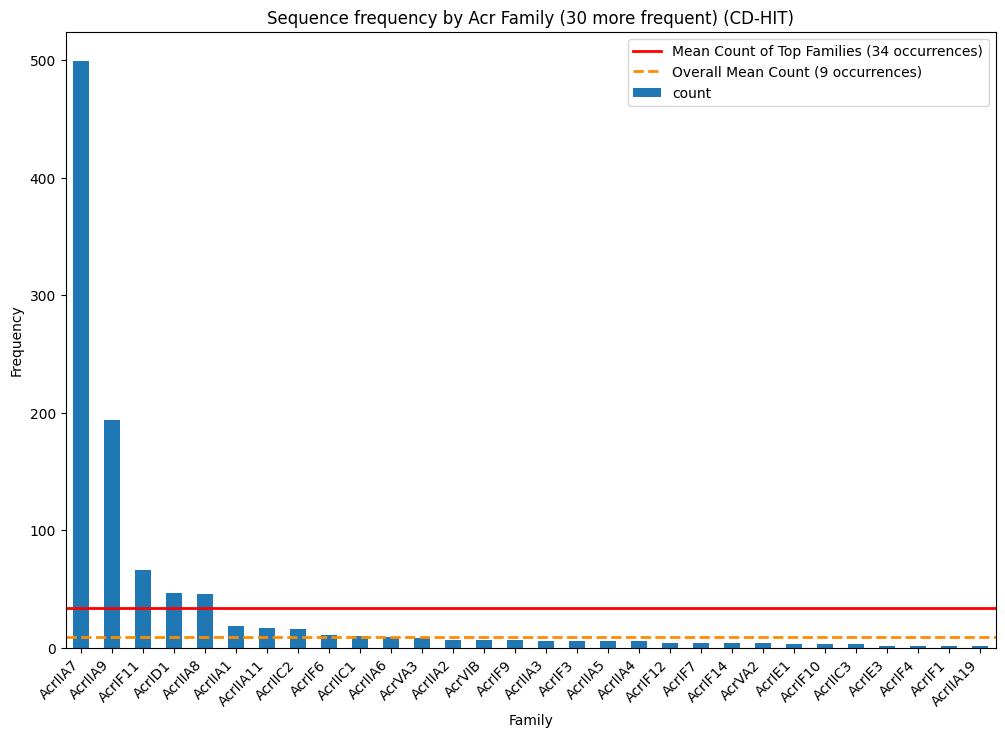

In [13]:
print('Number of unique Families:', len(df_cdhit['Family'].unique()))

# Obtain Family counts
family_counts = df_cdhit['Family'].value_counts()

# Get the top 30 most frequent families
top_family = family_counts.head(30)

# Calculate the mean count of occurrences of all families
overall_mean_count = round(family_counts.mean())

# Calculate the mean count of occurrences of top families
mean_count = round(top_family.mean())

# Plotting
plt.figure(figsize=(12, 8))
top_family.plot(kind='bar')
plt.axhline(y=mean_count, color='red', linestyle='-', linewidth=2, label=f'Mean Count of Top Families ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='darkorange', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Sequence frequency by Acr Family (30 more frequent) (CD-HIT)')
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()